In [3]:
# importing lib.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('mymoviedb.csv', lineterminator='\n')
# df = pd.read_csv('mymoviedb.csv', lineterminator='\n', parse_dates=['Release_Date'])
# df.shape

In [5]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [9]:
df['Genre'].head()

,Genre
0,"Action, Adventure, Science Fiction"
1,"Crime, Mystery, Thriller"
2,Thriller
3,"Animation, Comedy, Family, Fantasy"
4,"Action, Adventure, Thriller, War"


# Exploration Summary
- we have a dataframe consisting of 9827 rows and 9 columns.
- our dataset looks a bit tidy with no NaNs nor duplicated values.
- Release_Date column needs to be casted into date time and to extract only the year.
- Overview, Original_Languege and Poster-Url wouldn't be so useful during analysis.
- there is noticable outliers in Popularity column
- Vote_Average bettter be categorised for proper analysis.
- Genre column has comma saperated values and white spaces that needs to be handle.






### Convert 'Release_Date' column into Datetime format

In [10]:
# casting column a
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
df['Release_Date'].dtypes

dtype('<M8[ns]')

In [11]:
df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('int32')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   int32  
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int32(1), int64(1), object(5)
memory usage: 652.7+ KB


### Dropping Overview, Original_Languege and Poster-Url


In [13]:
# making list of column to be dropped
cols = ['Overview','Original_Language', 'Poster_Url']
df.drop(cols, axis=1, inplace=True)


In [14]:
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [15]:
df.head(2)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"


### categorizing Vote_Average column


In [16]:
def catigorize_col (df, col, labels):
 """
 catigorizes a certain column based on its quartiles

 Args:
 (df) df - dataframe we are proccesing
 (col) str - to be catigorized column's name
 (labels) list - list of labels from min to max

 Returns:
 (df) df - dataframe with the categorized col
 """

 # setting the edges to cut the column accordingly
 edges = [df[col].describe()['min'],
 df[col].describe()['25%'],
 df[col].describe()['50%'],
 df[col].describe()['75%'],
 df[col].describe()['max']]
 df['Category'] = pd.cut(df[col], edges, labels = labels, duplicates='drop')
 return df

In [17]:
# define labels for edges
labels = ['not_popular', 'below_avg', 'average', 'popular']
# categorize column based on labels and edges
catigorize_col(df, 'Vote_Average', labels)
# confirming changes
df['Category'].unique()


['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [18]:
df.head(2)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Category
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction",popular
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller",popular


In [19]:
df.dropna(inplace=True)
df.isna().sum()

,0
Release_Date,0
Title,0
Popularity,0
Vote_Count,0
Vote_Average,0
Genre,0
Category,0


### split genres

In [20]:
# split the strings into lists
df['Genre'] = df['Genre'].astype(str).str.split(', ')



In [21]:
# explode the lists
df = df.explode('Genre').reset_index(drop=True)

In [22]:
# casting column into category
# df['Genre'] = df['Genre'].astype('category')

In [23]:
df.dtypes

,0
Release_Date,int32
Title,object
Popularity,float64
Vote_Count,int64
Vote_Average,float64
Genre,object
Category,category


In [24]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Category
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action,popular
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure,popular
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction,popular
3,2022,The Batman,3827.658,1151,8.1,Crime,popular
4,2022,The Batman,3827.658,1151,8.1,Mystery,popular


In [25]:
# casting column into category
df['Genre'] = df['Genre'].astype('category')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  float64 
 5   Genre         25552 non-null  category
 6   Category      25552 non-null  category
dtypes: category(2), float64(2), int32(1), int64(1), object(1)
memory usage: 949.2+ KB


In [27]:
df.nunique()

,0
Release_Date,100
Title,9415
Popularity,8088
Vote_Count,3265
Vote_Average,73
Genre,19
Category,4


# Data Visualization

In [28]:
# setting up seaborn configurations
sns.set_style('whitegrid')

### Q1: What is the most frequent genre in the dataset?


In [31]:
# showing stats. on genre column
df['Genre'].describe()

,Genre
count,25552
unique,19
top,Drama
freq,3715


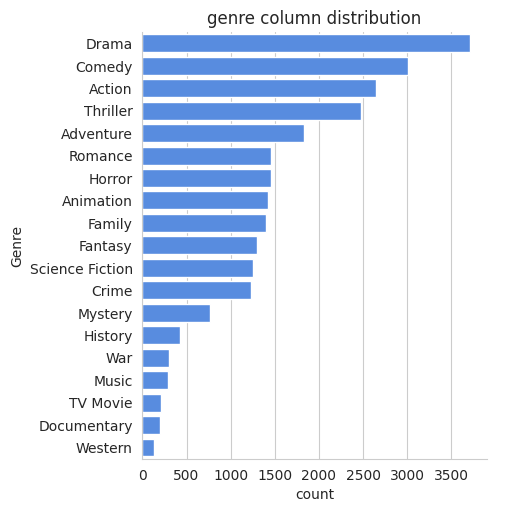

In [32]:
# visualizing genre column
sns.catplot(y = 'Genre', data = df, kind = 'count',
 order = df['Genre'].value_counts().index,
 color = '#4287f5')
plt.title('genre column distribution')
plt.show()

### Q2: What genres has highest votes ?

In [39]:
highest = df.groupby('Genre')['Vote_Count'].sum().sort_values(ascending=False)
highest

/tmp/ipython-input-39-3391949429.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  highest = df.groupby('Genre')['Vote_Count'].sum().sort_values(ascending=False)


,Vote_Count
Genre,
Drama,5141495
Action,4868675
Adventure,4313869
Comedy,3933497
Thriller,3631594
Science Fiction,2850476
Fantasy,2521940
Family,2046625
Crime,1980261


<Axes: ylabel='Vote_Count'>

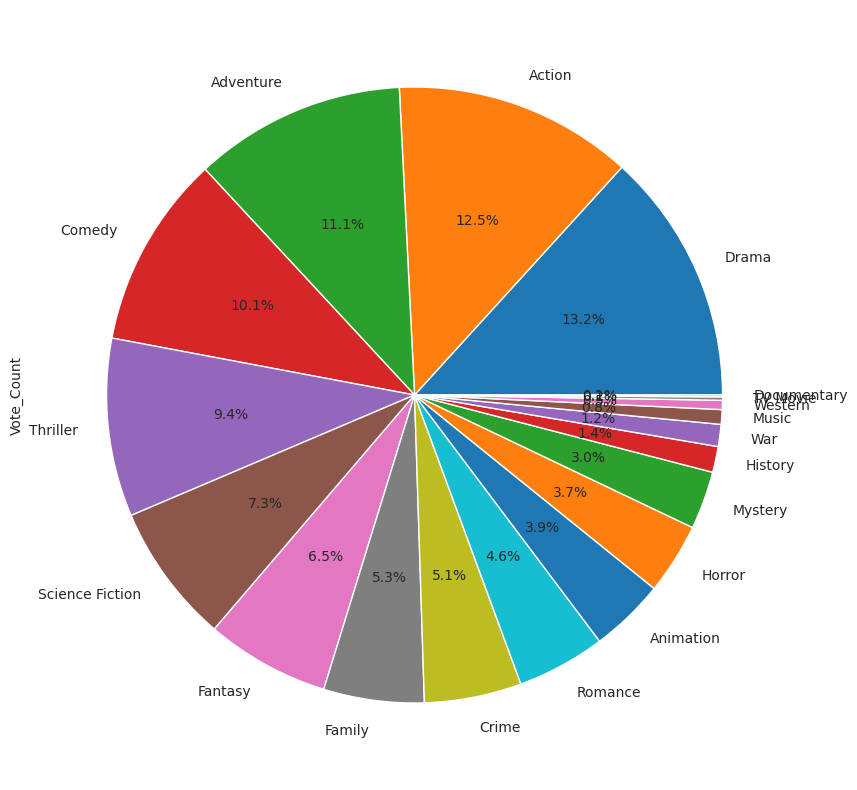

In [40]:
highest.plot(kind='pie', autopct='%1.1f%%', figsize=(10,10))

### Q3: What movie got the highest popularity ? what's its genre ?


In [44]:
df[df['Popularity'] == df['Popularity'].max()][['Title','Genre']]

,Title,Genre
0,Spider-Man: No Way Home,Action
1,Spider-Man: No Way Home,Adventure
2,Spider-Man: No Way Home,Science Fiction


### Q4: What movie got the lowest popularity? what's its genre?


In [45]:
df[df['Popularity'] == df['Popularity'].min()][['Title','Genre']]

,Title,Genre
25546,The United States vs. Billie Holiday,Music
25547,The United States vs. Billie Holiday,Drama
25548,The United States vs. Billie Holiday,History
25549,Threads,War
25550,Threads,Drama
25551,Threads,Science Fiction


### Q5: Which year has the most filmmed movies?

<Axes: title={'center': 'Release_Date column distribution'}, xlabel='year', ylabel='count'>

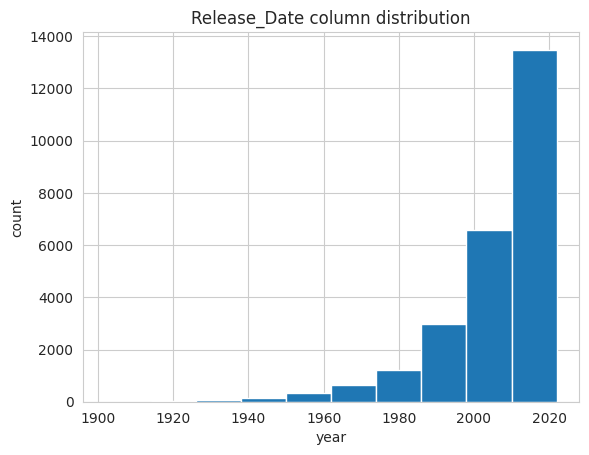

In [47]:
df['Release_Date'].plot(kind='hist',title='Release_Date column distribution',xlabel='year',ylabel='count')

# Conclusion


### Q1: What is the most frequent genre in the dataset?
Drama genre is the most frequent genre in our dataset and has appeared more than 14% of the times among 19 other genres.
### Q2: What genres has highest votes ?
we have 25.5% of our dataset with popular vote (6520 rows). Drama again gets the highest popularity among fans by being having more than 18.5% of movies popularities.
### Q3: What movie got the highest popularity ? what's its genre ?
Spider-Man: No Way Home has the highest popularity rate in our dataset and it has genres of Action , Adventure and Sience Fiction .
### Q4: What movie got the lowest popularity ? what's its genre ?
The united states, thread' has the highest lowest rate in our dataset and it has genres of music , drama , 'war', 'sci-fi' and history`.
### Q4: Which year has the most filmmed movies?
year 2020 has the highest filmming rate in our dataset